# 01. numpy & pandas (2)

GC  
2023-08-18

# import

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# df 만들기

## list $\to$ df

In [26]:
a1 = list(np.random.randint(0,100,10))
a2 = list(np.random.randint(0,100,10))
a3 = list(np.random.randint(0,100,10))
a4= list(np.random.randint(0,100,10))

df = pd.DataFrame([a1,a2,a3,a4]).T

In [27]:
df.head()

### 날짜 데이터 $\to$ df.index

In [29]:
date = pd.date_range("2023-08-18","2023-08-27",freq ="D")

In [32]:
df.index = date

### 컬럼 이름 생성

In [38]:
name = ["a" + str(i) for i in range(len(df.columns))]

In [41]:
df.columns= name

In [42]:
df.head()

------------------------------------------------------------------------

## dict $\to$ df ($\star\star\star$)

In [158]:
import random

In [157]:
code = ["a" + str(i) for i in range(10)]
height = np.linspace(160,180,10)
weight = np.linspace(60,80,10)
smoke = random.choices([True, False],k=10) ## 복원 추출
date = pd.date_range("2023-08-18","2023-08-27",freq ="D")

dic = {"code" : code,
      "height" : height,
      "weight" : weight,
      "smoke" : smoke}

df = pd.DataFrame(dic,index= date)

In [159]:
df.head()

------------------------------------------------------------------------

# csv 파일 로드

`-` mpg 데이터 로드

In [88]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/main/posts/mpg.csv")

In [89]:
df.head()

## 인덱스 정의

In [115]:
_lst = random.choices("ABC",k= len(df)) ## 중복허용
_n = list(np.random.choice(range(1, len(df)+1), len(df), replace=False)) ## 중복 허용 안함

In [117]:
index = [i + str(j) for i,j in zip(_lst,_n)]

In [119]:
df.index = index

## 인덱스 중복 확인

In [126]:
len(df) == len(df.index.unique())

## 인덱스 생성확인

In [122]:
df.head()

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, A115 to C75
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB

## df load + index (1)

In [127]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/main/posts/mpg.csv",
                 index_col="manufacturer")

In [128]:
df.head()

## df load + index (2)

In [146]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/main/posts/mpg.csv")
df = df.set_index("manufacturer") # == df.set_index("manufacturer",inplace= True)

In [149]:
df.head()

`-` 인덱스 이름 삭제

In [154]:
df.index.name = None
df.head()

## 인덱스 삭제(index 버리기 x)

In [155]:
_df = df.reset_index()
_df.head()

## 인덱스 삭제(index 버리기 o)

In [156]:
_df = df.reset_index(drop=True)
_df.head()

------------------------------------------------------------------------

# 탐색적 자료 분석(EDA)

## import

In [13]:
import random
import pandas as pd
import plotly.express as px

`-` tip 데이터는 `plotly` 모듈에서 제공한다.

In [2]:
tip = px.data.tips()

In [3]:
tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB

In [4]:
tip.shape

In [5]:
tip.index

`-` 값 확인

In [6]:
tip.values

`-` 기초통계정보 확인

In [7]:
tip.describe()

In [8]:
tip.head()

## sort

`-` total_bill 기준 오름차순 정렬

In [8]:
tip.sort_values(by = "total_bill").head()

`-` 내림차순 정렬

In [10]:
tip.sort_values(by = "total_bill",ascending=False).head()

`-` 복합열 정렬 : total_bill은 오름차순, tip은 내림차순 기준으로 정렬

In [12]:
tip.sort_values(by = ["total_bill","tip"],ascending=[False,True])

## unique값 확인 (범주형 데이터)

`-` day열의 unique값 확인

In [24]:
#tip.day

In [22]:
tip.day.unique()

`-` unique값 개수 확인

In [40]:
tip.day.value_counts()

`-` 시각화

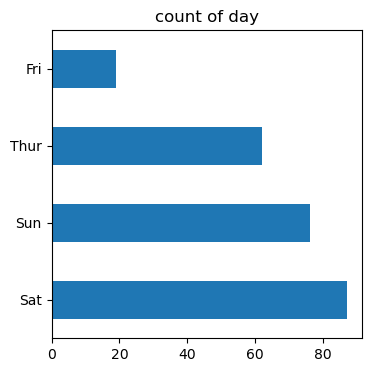

In [50]:
tip.day.value_counts().plot(kind="barh",title="count of day",figsize = (4,4))

`-` smoker 몇 명이나 있는지 확인

In [53]:
tip.smoker.value_counts()

`-` 비율 확인

In [54]:
tip.smoker.value_counts() / len(tip) # = tip.smoker.value_counts(normalize = True)

`-` 비율 시각화

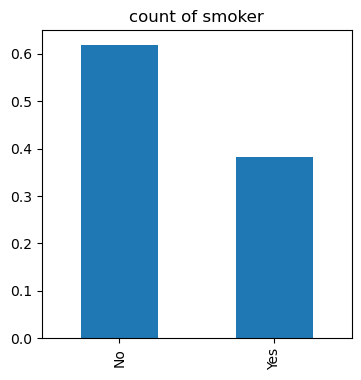

In [57]:
(tip.smoker.value_counts() / len(tip)).plot(kind="bar",title="count of smoker",figsize = (4,4))

`-` total_bill의 lineplot 확인

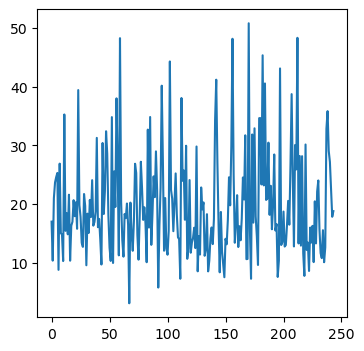

In [37]:
tip.total_bill.plot(figsize=(4,4))

## 최빈값

In [61]:
tip.day.value_counts()

In [60]:
tip.day.mode()

In [63]:
tip.smoker.mode()

## `df.sum`

### axis=0 (개별 컬럼의 합을 계산)

In [71]:
tip.head()

In [93]:
tip.sum(axis=0)

### 평균과 중앙값

In [95]:
tip[["total_bill","tip"]].mean()

In [96]:
tip[["total_bill","tip"]].median()